### Part I - Research Question

***Reasearch Question (A1)***
The research question I am looking to answer in this analysis is *"Can k-means clustering reveal distinct patterns or segments within customer survey scores, and do these segments correlate with variations in overall satisfaction and potential churn?"*. I strongly believe that this question would be a value add for the organization as we could potentially use as a way to gauge customer satisfaction.


***Goal of Data Analysis (A2)***
As I have stated in prior write ups the cost to acquire a customer is more expensive than it is to maintin an already existing customer. The benefits associated with this analysis are as follows; being able to indentify key aspects that contribute to customer churn will allow for the creation of strategies that can be implemented in order to mitigate the amount of customers choosing to churn. This can lead to a direct cost savings by not having to focus as heavily on marketing to new customers. Another benefit associated for the company would be the competitve advantage that is created by using data in order to inform insights.


### Part II: Technique Justification

***Justification of Technique (B1)***

AnalyitcsVidhya goes on to describe the k-means clustering algorithm as an *"iterative process used to partition a dataset into 'k' clusters based on similarity."* The algorithm starts by randomly initializing 'k' cluster centroids and then iteratively assigns data points to the cluster whose centroid is closest, followed by updating the centroids based on the mean of the assigned points. This process repeats until convergence, where the centroids no longer change significantly. The algorithm aims to minimize the sum of squared distances within clusters, effectively grouping data points with similar characteristics. Multiple runs with different initializations can be performed to mitigate convergence to a local minimum, and the final clustering solution is chosen based on criteria like minimizing the sum of squared distances.


***Assumption of Technique (B2)***
One assumption of KMeans Clustering is that the scale of variables can influence clustering resluts. Due to this assumption we will need to ensure that the variables have been scaled. This should not be a problem for our analysis due to the survey data already being scaled from 1-8. Our churn variable will not be used until we calculate the model accuracy.

***Package Selection (B3)***
|Library|Descrtption
|---|---|
|Pandas|Data analysis and preperation|
|Numpy|Data analysis and preperation|
|Matplotlib|Data visualization|
|Seaborn|Data visualization|
|Scikit learn|Machine learning and predictive modeling|


### Part III: Data Preparation

***Preprocessing goal***
A data preprocessing goal for this analysis will be noise reduction. Variables that do not contribute to this analysis will be removed in order to ensure that the clustering algorithm is able to find meaningful patterns.Moreover the variables will be renamed to more align with a python casing conventions. By taking the time to address preprocessing goals it will assist us in creating a more reliable clustering model.

***Variable Selection***

|Variable|Continous/Categorical|
|---|---|
|Churn|Categorical|
|Item1|Continuous|
|Item2|Continuous|
|Item3|Continuous|
|Item4|Continuous|
|Item5|Continuous|
|Item6|Continuous|
|Item7|Continuous|
|Item8|Continuous|

---

Data Cleaning Steps

1. Importing the dataframe into python.
2. Identifying relevant columns to use in analysis
3. Perform basic cleaning of variable naming conventions.
4. Creating subset of numerical variables to perform KMeans Clustering.
5. I will use the elbow method to determine the most suitable number of clusters.
6. Calculating accuracy score of model.

***Expected Outcomes***

In this analysis, I expect K-means clustering to reveal clusters of customers with similar satisfaction levels based on their survey response. Rather than expecting a dendrogram as in hierarchical clustering, K-means will provide distinct partitions of customers into clusters, this will allow for a clear understanding of survey satisfaction patterns. The goal is to gain insights into how payment preferences influence overall customer satisfaction. Moreover, I plan to share the results with internal stakeholders for review. The results  from this K-means analysis will be used to create targeted marketing strategies aimed at enhancing current customer retention efforts.

In [18]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import metrics 
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

# import data from csv
df = pd.read_csv('churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [2]:
#renaming columns to python casing.
col_head = {
    'CaseOrder': 'case_order',
    'Customer_id': 'customer_id',
    'Interaction': 'interaction',
    'City': 'city',
    'State': 'state',
    'County': 'county',
    'Zip': 'zip',
    'Lat': 'lat',
    'Lng': 'lng',
    'Population': 'population',  
    'Area': 'area',  
    'Job': 'job',
    'Children': 'children',
    'Age': 'age', 
    'Income': 'income',  
    'Marital': 'marital_type',
    'Gender': 'gender',
    'Churn': 'churn',
    'Outage_sec_perweek': 'outage_sec_perweek',
    'Email': 'email',
    'Contacts': 'contacts',
    'Yearly_equip_failure': 'yearly_equip_failure',
    'Techie': 'techie',
    'Contract': 'contract',
    'Port_modem': 'port_modem',
    'Tablet': 'tablet',
    'InternetService': 'internet_service',
    'Phone': 'phone',
    'Multiple': 'multiple_lines',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'Tenure': 'tenure',
    'MonthlyCharge': 'monthly_charge',
    'Bandwidth_GB_Year': 'bandwidth_gb_year',
    'Item1': 'timely_response',
    'Item2': 'timely_fixes',
    'Item3': 'timely_replacements',
    'Item4': 'reliability',
    'Item5': 'options',
    'Item6': 'respectful_response',
    'Item7': 'courteous_exchange',
    'Item8': 'active_listening'}
df.rename(columns=col_head, inplace=True)

#Reexpressing the values of payment method to be more concise.
dict_pay = {"payment_method": {
     "Credit Card (automatic)": "Autopay",
     "Bank Transfer(automatic)": "Autopay",
     "Electronic Check": "Autopay",
     "Mailed Check": "Check",
}}
df.replace(dict_pay, inplace = True)

#remapping data types
df_col = df.astype({
    'timely_response': np.float64,
    'timely_fixes': np.float64,
    'timely_replacements': np.float64,
    'reliability': np.float64,
    'options': np.float64,
    'respectful_response': np.float64,
    'courteous_exchange': np.float64,
    'active_listening': np.float64,
}, copy=False)

In [3]:
#dropping columns not relevant to the analysis
df = df.drop(columns=['customer_id', 'interaction', 'UID', 'city', 'state', 'county', 'zip',
                   'lat', 'lng', 'population', 'area', 'TimeZone', 'job', 'children',
                   'age', 'income', 'marital_type', 'gender', 'payment_method',
                   'outage_sec_perweek', 'email', 'contacts', 'yearly_equip_failure',
                   'techie', 'contract', 'port_modem', 'tablet', 'internet_service',
                   'phone', 'multiple_lines', 'online_security', 'online_backup',
                   'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
                   'paperless_billing', 'tenure', 'monthly_charge',
                   'bandwidth_gb_year'])

In [4]:
subset = df[['timely_fixes','timely_response','timely_replacements','reliability','options','respectful_response','courteous_exchange','active_listening']]

In [5]:
subset.head()

,timely_fixes,timely_response,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening
0,5,5,5,3,4,4,3,4
1,4,3,3,3,4,3,4,4
2,4,4,2,4,4,3,3,3
3,4,4,4,2,5,4,3,3
4,4,4,4,3,4,4,4,5


In [6]:
#Checking for null values
if df.isnull().sum().sum() == 0:
    print("No null values.")
else:
    print("Null values exist!")

No null values.


In [7]:
subset.describe()

,timely_fixes,timely_response,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.505100,3.490800,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,1.034641,1.037797,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


Variables will not be scaled as they are all 1-8.

In [8]:
#copy of prepared dataset
subset.to_csv('task1_variables.csv',index=False)

### Part IV Analysis

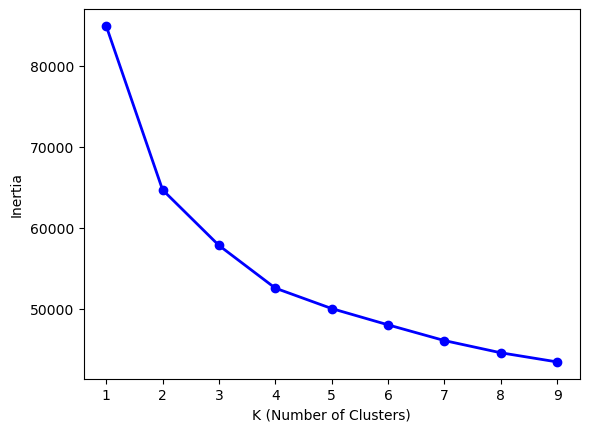

In [9]:
inertia = []
for i in range(1,10):
    kmeanModel = KMeans(n_clusters=i, n_init=10)
    kmeanModel.fit(subset)
    inertia.append(kmeanModel.inertia_)
    
#Plotting the elbow graph
plt.plot(range(1,10), inertia, 'o-', linewidth=2, color='blue')
plt.xlabel('K (Number of Clusters)')
plt.ylabel('Inertia')
plt.show()

Using the dataset, my code conducts a k-means clustering analysis. The number of clusters (K) is iterated over a range of values, from 1 to 9. It builds a KMeans model for each K value, fits it to a subset of the data (subset), and then adds the inertia. Inertia is the total squared distances between samples and the nearest cluster. I then use Matplotlib to plot an elbow graph with the number of clusters (K) on the x-axis and the inertia on the y-axis after iterating through the range of K values.I can use the graph to determine the ideal number of clusters by showing the "elbow" point, or the point at which inertia begins to diminish more slowly, for my model this is 2. Based on this the optimal number of clusters would be two (k=2).

### Building a model

In [25]:
# Create KMeans cluster
model = KMeans(n_clusters=2)
model.fit(subset)
model.labels_

array([0, 1, 1, ..., 0, 0, 1])

In [26]:
model.cluster_centers_

array([[4.14233279, 4.16700653, 4.0699429 , 3.7069739 , 3.23552202,
        4.07952692, 4.01794454, 3.93454323],
       [2.89187598, 2.84007064, 2.92602041, 3.29591837, 3.74058085,
        2.93700942, 3.02021193, 3.07319466]])

n_clusters = 2, the silhouette score is 0.2022991197361273
n_clusters = 3, the silhouette score is 0.15322107554852551
n_clusters = 4, the silhouette score is 0.13983681211284252
n_clusters = 5, the silhouette score is 0.11960382901896717
n_clusters = 6, the silhouette score is 0.11214345420382477
n_clusters = 7, the silhouette score is 0.11184153149542271
n_clusters = 8, the silhouette score is 0.1036206165041553
n_clusters = 9, the silhouette score is 0.10105748165768835
n_clusters = 10, the silhouette score is 0.0993044241674026


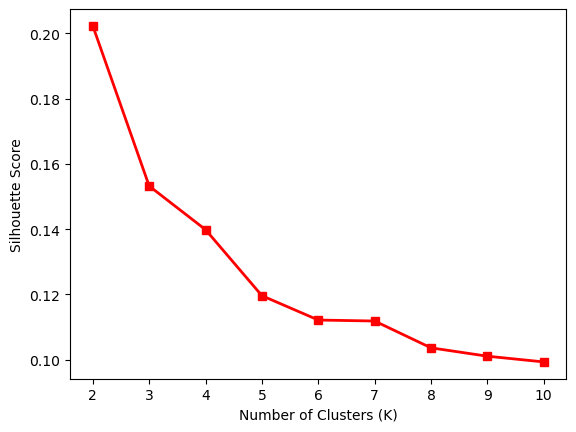

In [12]:
clusters_range = range(2, 11)

# List for silhouette scores
silhouette_scores = []

# Loop through different numbers of clusters
for i in clusters_range:
    kmeanModel = KMeans(n_clusters=i, n_init=10)
    kmeanModel.fit(subset)

# Calculate silhouette score
    silhouette_avg = silhouette_score(subset, kmeanModel.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f"n_clusters = {i}, the silhouette score is {silhouette_avg}")

# visualizing the silhouette score
plt.plot(clusters_range, silhouette_scores, 's-', linewidth=2, color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

In [28]:
# Calculate WCSS/Inertia
inertia = model.inertia_

# Calculate Silhouette Score
labels = model.labels_
silhouette_avg = silhouette_score(subset, labels)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(subset, labels)

# Print the metrics
print("WCSS/Inertia:", inertia)
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", db_index)

WCSS/Inertia: 64659.53183640282
Silhouette Score: 0.20229796527620564
Davies-Bouldin Index: 1.721201210884158


### Model Accuracy

### Part IV Summary

***Explain Accuracy of Clustering Technique(E1)***

The quantitative measure used to evaluate the accuracy of the kmeans cluster was the Silhouette method. The silhouette score works by taking the average distance between a data points within its own cluster and comparing them against neighboring clusters. The silhouette score has a range from 1 to -1. Having a score of 1 indicates that the clusters mean that the clusters are a good distance from each other and a score of -1 would indicate that the clusters are not seperated well enough. Our models average score of 0.2022 shows a moderate level of seperation between clusters, but we would want the score to be as high as possible typically. 

The WCSS/Inertia measures the sum of squared distances between each data point in a cluster and the centroid of that cluster, it is more of a measure of the compactness of clusters but it does not give a absolute measure as to how good the clustering is. The inertia of 6.4659.53 shows that on average the datapoints within the clusters are moderately spreadout from their centroids. A lower WCSS would mean that the model has more compact clusters. Lastly the final measure that I used to measure the cluster validity was the Davies-Bouldin index. It is the average similarity ratio of each cluster, having a lower score means that there is better clustering and we would typically aim for a value as close to zero as possible. Our score of 1.721 means that the clustering quality is moderate.


***Results of Clustering Analysis(E2)***

I used the elbow method in order to get the optimal value for k. The optimal k value was 2 for this analysis, additionally the silhouette method also showed that the optimal value for k is also 2. For n_clusters = 2 the Silhouette score would be 0.2022. The cluster centers given by the array in the first row are; '[4.14233279, 4.16700653, 4.0699429, 3.7069739, 3.23552202, 4.07952692, 4.01794454, 3.93454323]'. This array represents the centroid of the first cluster in an 8 dimensional space. For the second row the array values are; '[2.89187598, 2.84007064, 2.92602041, 3.29591837, 3.74058085, 2.93700942, 3.02021193, 3.07319466]', with the second array representing the second cluster in an 8 dimensional space. In clustering algorithms like Kmeans the cluster centers represent the centroid of each cluster in a feature space. since I am working in an eight dimensional feature space each row has 8 values to show the centroid of each cluster in that particular space. The first cluster center has higher values accross several dimensions compared to the second cluster. Moreover the values for 'timely_fixes', 'timely_response', and 'respectful_response' are much larger which would lead me to beleive that data points in this cluster most likely have higher feature values within those dimensions. Analyzing the second cluster which has lower feature values in most of these dimensions, which compared to the first cluster would lead me to believe that the clusters seperate datapoints based on their feature values and centroid coordinates. 


***One limitation of your data analysis(E3)***

One limitation of this analysis is that we dont have the ability to use categorical features that would be more useful in terms of being able to cluster consumers better and provide more useful insight.

***Recommendation based on this analysis (E4)***

I would recommend that go back and try to add in some of the other continouous features in order to gain more insight into customer behavior. For example a customers survey score may be impacted on the services they use or their monthly charge. Additionally I would reccommend to stakeholders that we could also examine the characteristics of each cluster in order to understand the factors that contribute to the seperation and if there is any correlation amongst some of the survey response answers.

***Link to Panopto Recording***
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=7af66492-e5f5-48b1-af89-b0ff002ddfc5


### Sources

Sharma, P. (2019, August 19). The Ultimate Guide to K-Means Clustering: Definition, Methods and Applications. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/#:~:text=The%20k%2Dmeans%20algorithm%20uses


https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/